In [79]:
import pandas as pd

In [80]:
plain_data = pd.read_csv('./titanic_data/train.csv', index_col=0)
plain_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [119]:
y = plain_data['Survived']

In [83]:
plain_data.columns

Index([u'Survived', u'Pclass', u'Name', u'Sex', u'Age', u'SibSp', u'Parch',
       u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [84]:
temp = plain_data.copy(deep=True)
temp['Sex'].fillna('male')
temp['Embarked'].fillna('S')

gender_dict = {'male':0, 'female':1}
embarked_dict = {'S':0, 'C':1, 'Q':2}

temp.replace(to_replace={'Sex':gender_dict}, inplace=True)
temp.replace(to_replace={'Embarked':embarked_dict}, inplace=True)

temp

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0
6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,2.0
7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0.0
8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,0.0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,0.0


In [92]:
median_age = temp['Age'].median()
median_fare = temp['Fare'].median()

temp['Age'] = temp['Age'].fillna(median_age)
temp['Fare'] = temp['Fare'].fillna(median_fare)
temp.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.00,NaN,0.0
888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.00,B42,0.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.45,NaN,0.0
890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.00,C148,1.0
891,0,3,"Dooley, Mr. Patrick",0,32.0,0,0,370376,7.75,NaN,2.0


In [189]:
features_for_prediction = ['Age', 'Fare', 'Sex', 'Embarked']
X = temp[features_for_prediction]
print X.shape
print y.shape

(891, 4)
(891,)


In [277]:
import numpy as np
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

embark_col=X_train['Embarked']
embark_col.replace(to_replace=np.nan, value=0, inplace=True)
X_train['Embarked'].update(embark_col)

print np.any(np.isnan(X_train['Embarked']))

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

False


/Users/selvaram/Documents/conda/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


False

In [172]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [153]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.80269058295964124

In [154]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

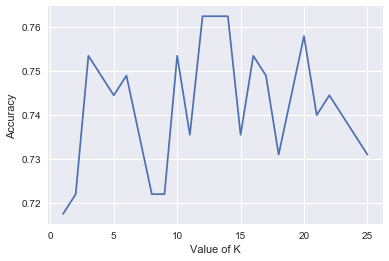

In [155]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')

In [157]:
print temp['Embarked']

PassengerId
1      0.0
2      1.0
3      0.0
4      0.0
5      0.0
6      2.0
7      0.0
8      0.0
9      0.0
10     1.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     2.0
18     0.0
19     0.0
20     1.0
21     0.0
22     0.0
23     2.0
24     0.0
25     0.0
26     0.0
27     1.0
28     0.0
29     2.0
30     0.0
      ... 
862    0.0
863    0.0
864    0.0
865    0.0
866    0.0
867    1.0
868    0.0
869    0.0
870    0.0
871    0.0
872    0.0
873    0.0
874    0.0
875    1.0
876    1.0
877    0.0
878    0.0
879    0.0
880    1.0
881    0.0
882    0.0
883    0.0
884    0.0
885    0.0
886    2.0
887    0.0
888    0.0
889    0.0
890    1.0
891    2.0
Name: Embarked, Length: 891, dtype: float64
